<a href="https://colab.research.google.com/github/natefusion/file-sharing-cloud-server/blob/main/transfer_metrics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libraries for data manipulation and visualization
import numpy as np
import matplotlib.pyplot as plt


In [11]:
#transfer_metrics.pkl on the server

#The file will contain a python dictionary with "upload_rate", "download_rate", "file_transfer_times", "system_response_times" entries.
fname = 'transfer_metrics-25719267-8b18-4866-b539-49be346eee27.pkl'

#import transport metrics
import pickle
with open(fname, 'rb') as f:
    metrics = pickle.load(f)

In [12]:
upload_rate = metrics['upload_rate']
download_rate = metrics['download_rate']
file_transfer_times = metrics['file_transfer_times']
system_response_times = [x[1] for x in metrics['system_response_times']]

In [13]:
cp_response = []
ls_response = []
rm_response = []
mkdir_response = []
for x in metrics['system_response_times']:
    if x[0] == 'cp':
        cp_response.append(x[1])
    elif x[0] == 'ls':
        ls_response.append(x[1])
    elif x[0] == 'rm':
        rm_response.append(x[1])
    elif x[0] == 'mkdir':
        mkdir_response.append(x[1])

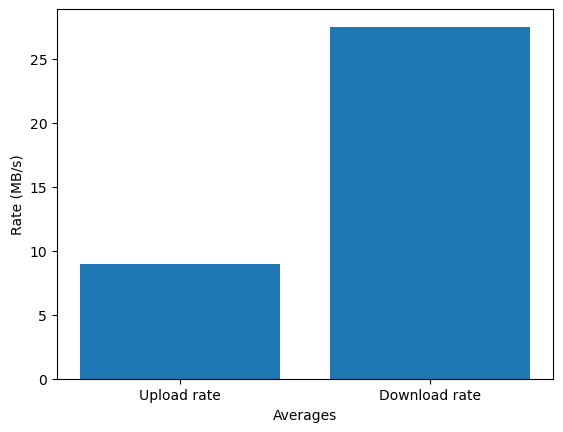

In [14]:
rate_labels = ['Upload rate', 'Download rate']
rate_avgs = [np.mean(upload_rate), np.mean(download_rate)]
plt.bar(rate_labels, rate_avgs)
plt.xlabel('Averages')
plt.ylabel('Rate (MB/s)')
plt.show()

/tmp/ipykernel_78021/1632723308.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot((upload_rate, download_rate), labels=rate_labels, showfliers=False)


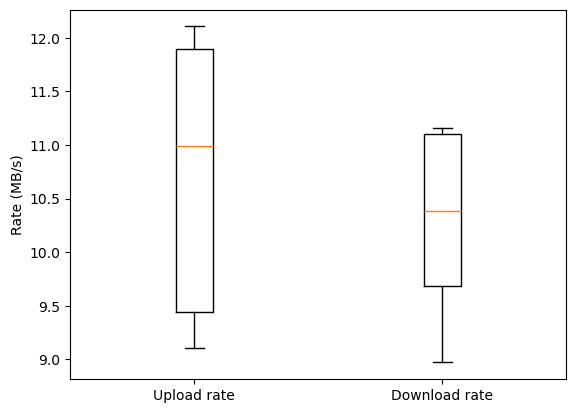

In [15]:
plt.boxplot((upload_rate, download_rate), labels=rate_labels, showfliers=False)
plt.ylabel('Rate (MB/s)')
plt.show()

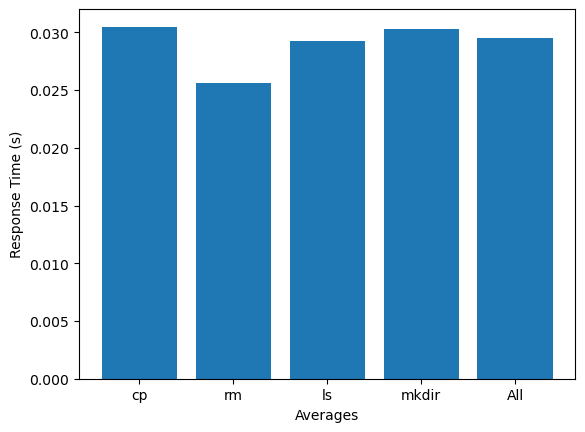

In [16]:
response_labels = ['cp', 'rm', 'ls', 'mkdir', 'All']
response_avgs = [np.mean(cp_response), np.mean(rm_response), np.mean(ls_response), np.mean(mkdir_response), np.mean(system_response_times)]
plt.bar(response_labels, response_avgs)
plt.xlabel('Averages')
plt.ylabel('Response Time (s)')
plt.show()

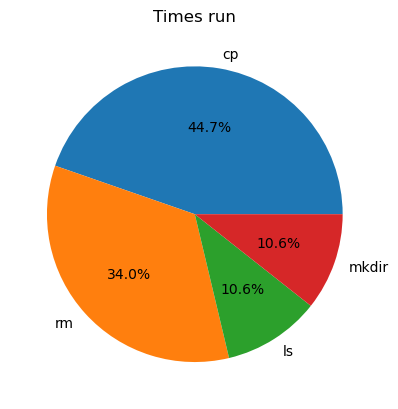

In [17]:
times_run = [len(cp_response), len(ls_response), len(rm_response), len(mkdir_response)]
plt.pie(times_run, labels=response_labels[0:4], autopct='%1.1f%%')
plt.title('Times run')
plt.show()

/tmp/ipykernel_78021/3707931554.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot((cp_response, rm_response, ls_response, mkdir_response, system_response_times), showfliers=False, labels=response_labels)


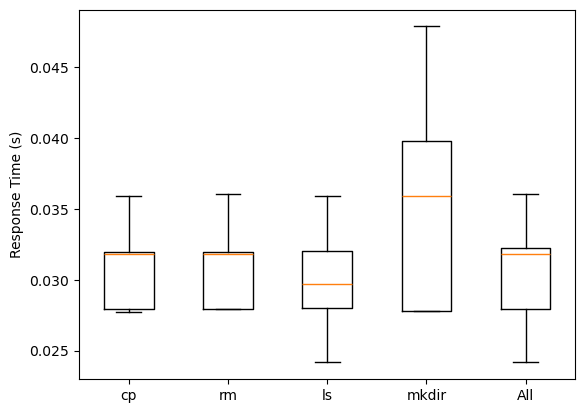

In [10]:
plt.boxplot((cp_response, rm_response, ls_response, mkdir_response, system_response_times), showfliers=False, labels=response_labels)
plt.ylabel('Response Time (s)')
plt.show()